Importing libraries and modules

In [251]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

Importing dataset

In [252]:
df = pd.read_csv('H2.csv')

Inspecting the dataset

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [254]:
df.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79326.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000
mean,0.417270,109.735724,2016.174285,27.177449,15.786625,0.795185,2.182957,1.850977,0.091370,0.004941,0.025615,0.079743,0.132371,0.187369,3.226774,105.304465,0.024367,0.546918
std,0.493111,110.948526,0.699181,13.398523,8.728451,0.885026,1.456416,0.509292,0.372177,0.084323,0.157983,0.415472,1.693411,0.608620,20.870890,43.602954,0.154919,0.780776
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.200000,0.000000,0.000000
50%,0.000000,74.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.900000,0.000000,0.000000
75%,1.000000,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,10.000000,1.000000,21.000000,72.000000,21.000000,391.000000,5400.000000,3.000000,5.000000


In [255]:
#pd.set_option('display.max_columns', None)
print(df.head())

   IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0         6             2015             July   
1           1        88             2015             July   
2           1        65             2015             July   
3           1        92             2015             July   
4           1       100             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     2   
4                     27                      2                     0   

   StaysInWeekNights  Adults  Children  ...      DepositType Agent  \
0                  2       1       0.0  ...  No Deposit          6   
1                  4       2       0.0  ...  No Deposi

Preprocess input data

In [256]:
#Dropping columns that does not have significance in predicting hotel booking cancellation
df.drop('ArrivalDateYear', axis=1, inplace=True)
df.drop('ArrivalDateWeekNumber', axis=1, inplace=True)
df.drop('ArrivalDateDayOfMonth', axis=1, inplace=True)

#Replacing na values in columns with 0
#Stripping extra spaces in columns
#Replacing '       NULL' value in columns to 0 
#Encoding strings in columns as integer
df['ArrivalDateMonth'] = pd.factorize(df['ArrivalDateMonth'])[0]
df['Children'] = df['Children'].fillna(0)
df['Children'] = pd.factorize(df['Children'])[0]
df['Meal'] = df['Meal'].str.strip()
df['Meal'] = pd.factorize(df['Meal'])[0]
df['Country'] = pd.factorize(df['Country'])[0]
df['MarketSegment'] = pd.factorize(df['MarketSegment'])[0]
df['DistributionChannel'] = pd.factorize(df['DistributionChannel'])[0]
df['ReservedRoomType'] = df['ReservedRoomType'].str.strip()
df['ReservedRoomType'] = pd.factorize(df['ReservedRoomType'])[0]
df['AssignedRoomType'] = df['AssignedRoomType'].str.strip()
df['AssignedRoomType'] = pd.factorize(df['AssignedRoomType'])[0]
df['DepositType'] = df['DepositType'].str.strip()
df['DepositType'] = pd.factorize(df['DepositType'])[0]
df['Agent'] = df.Agent.apply(lambda a: 0 if a == '       NULL' else a)
df['Agent'] = pd.factorize(df['Agent'])[0]
df['Company'] = df.Company.apply(lambda c: 0 if c == '       NULL' else c)
df['Company'] = pd.factorize(df['Company'])[0]
df['CustomerType'] = pd.factorize(df['CustomerType'])[0]
df['ReservationStatus'] = pd.factorize(df['ReservationStatus'])[0]

#Dropping irrelevent columns
df.drop('ReservationStatus', axis=1, inplace=True)
df.drop('ReservationStatusDate', axis=1, inplace=True)

In [257]:
#pd.set_option('display.max_columns', None)
print(df.head())

   IsCanceled  LeadTime  ArrivalDateMonth  StaysInWeekendNights  \
0           0         6                 0                     0   
1           1        88                 0                     0   
2           1        65                 0                     0   
3           1        92                 0                     2   
4           1       100                 0                     0   

   StaysInWeekNights  Adults  Children  Babies  Meal  Country  ...  \
0                  2       1         0       0     0        0  ...   
1                  4       2         0       0     1        0  ...   
2                  4       1         0       0     1        0  ...   
3                  4       2         0       0     1        0  ...   
4                  2       2         0       0     1        0  ...   

   AssignedRoomType  BookingChanges  DepositType  Agent  Company  \
0                 0               0            0      0        0   
1                 0               0     

Splitting the dataset into input features (X) and output (y)

In [258]:
X = df.drop('IsCanceled', axis=1)
y = df['IsCanceled']

Normalizing the input features

In [259]:
scaler = StandardScaler() 
X = scaler.fit_transform(X) 

Splitting dataset into training and testing sets

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [261]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(63464, 25)
(63464,)
(15866, 25)
(15866,)


Defining model architecture

In [262]:
model = Sequential() 
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) 
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Compiling model

In [263]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Defining Model Checkpoint

In [264]:
checkpoint_filepath = 'model.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, 
    save_weights_only=False, 
    monitor='val_accuracy', 
    mode='max', 
    save_best_only=True)

Fitting model on training data

In [265]:
history = model.fit(X_train, y_train, 
                    epochs=5, 
                    batch_size=32, 
                    validation_data=(X_test, y_test),
                    callbacks=[model_checkpoint_callback])

Epoch 1/5
1984/1984 [==============================] - 5s 2ms/step - loss: 0.3958 - accuracy: 0.8136 - val_loss: 0.3646 - val_accuracy: 0.8226
Epoch 2/5
1984/1984 [==============================] - 4s 2ms/step - loss: 0.3508 - accuracy: 0.8337 - val_loss: 0.3474 - val_accuracy: 0.8349
Epoch 3/5
1984/1984 [==============================] - 4s 2ms/step - loss: 0.3399 - accuracy: 0.8387 - val_loss: 0.3409 - val_accuracy: 0.8398
Epoch 4/5
1984/1984 [==============================] - 4s 2ms/step - loss: 0.3309 - accuracy: 0.8428 - val_loss: 0.3335 - val_accuracy: 0.8451
Epoch 5/5
1984/1984 [==============================] - 4s 2ms/step - loss: 0.3243 - accuracy: 0.8465 - val_loss: 0.3354 - val_accuracy: 0.8422


Loading model saved in earlier step

In [266]:
model = load_model(checkpoint_filepath)

Evaluating model on test data

In [267]:
score = model.evaluate(X_test, y_test)

496/496 [==============================] - 1s 1ms/step - loss: 0.3335 - accuracy: 0.8451


In [268]:
score

[0.3335217833518982, 0.8450775146484375]

Visualizing Accuracy and Loss

In [269]:
import matplotlib.pyplot as plt

Plotting the training and validation accuracy over epochs

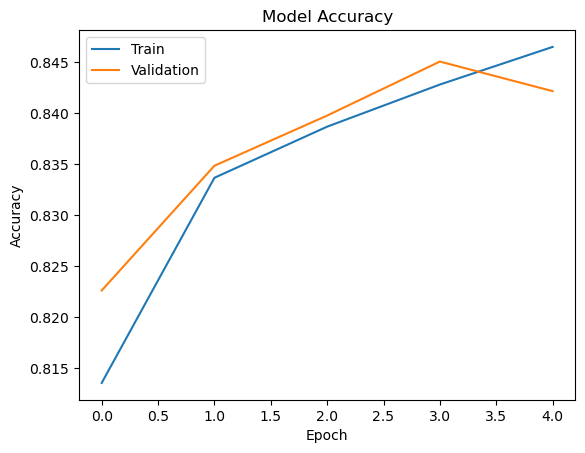

In [270]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Plotting the training and validation loss over epochs

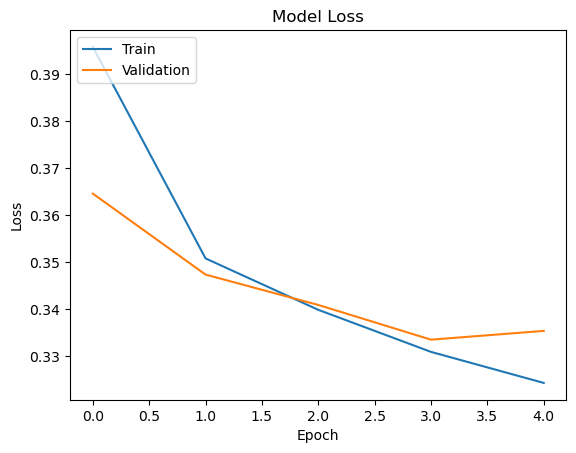

In [271]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()